In [59]:
import pandas as pd
import numpy as np

In [60]:
dt = pd.read_excel('realstate_dataset.xlsx')

In [61]:
dt.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [62]:
dt.shape

(414, 8)

In [63]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [64]:
dt.isnull().any()

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

C:\Users\k Sai Shashank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X3 distance to the nearest MRT station'>

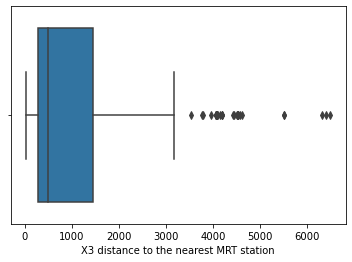

In [65]:
sns.boxplot(dt['X3 distance to the nearest MRT station'])

In [68]:
lw=dt['X3 distance to the nearest MRT station'].quantile(0.05)
up=dt['X3 distance to the nearest MRT station'].quantile(0.95)
dt=(dt['X3 distance to the nearest MRT station'] >lw) & (dt['X3 distance to the nearest MRT station'] < up)

In [66]:
dt.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [67]:
x=dt.iloc[:,1:7].values
y=dt.iloc[:,7:8].values

In [58]:
x

array([[2012.9166667,   32.       ,   84.87882  ,   10.       ,
          24.98298  ,  121.54024  ],
       [2012.9166667,   19.5      ,  306.5947   ,    9.       ,
          24.98034  ,  121.53951  ],
       [2013.5833333,   13.3      ,  561.9845   ,    5.       ,
          24.98746  ,  121.54391  ],
       ...,
       [2013.25     ,   18.8      ,  390.9696   ,    7.       ,
          24.97923  ,  121.53986  ],
       [2013.       ,    8.1      ,  104.8101   ,    5.       ,
          24.96674  ,  121.54067  ],
       [2013.5      ,    6.5      ,   90.45606  ,    9.       ,
          24.97433  ,  121.5431   ]])

# Multi Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [73]:
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
y_pred=lr.predict(x_test)

In [75]:
from sklearn.metrics import r2_score


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

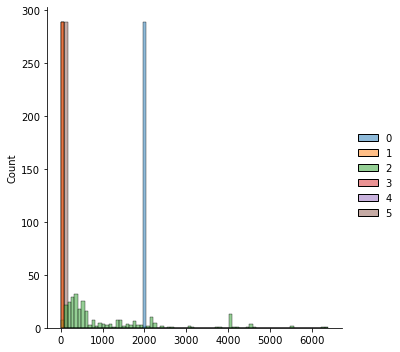

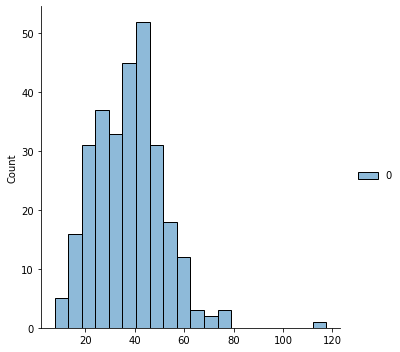

In [77]:
sns.displot(x_train)
sns.displot(y_train)

In [78]:
ac=r2_score(y_test,y_pred)

In [79]:
ac

0.6483053449575178

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [82]:
import pickle
with open('scale.pkl','wb') as f:
    pickle.dump(sc,f)


# DECISION TREE

In [83]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [84]:
dtr = DecisionTreeRegressor(random_state=40)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=40)

In [85]:
y_pred=dtr.predict(x_test)

In [86]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [87]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [88]:
ac

0.6228546701807869

In [54]:
rm

5.479518072289156

In [89]:
ms

64.2862048192771

# Random Forest

In [371]:
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [434]:
rf=RandomForestRegressor(n_estimators=20,random_state=80)
rf.fit(x_train,y_train)

C:\Users\k Sai Shashank\AppData\Local\Temp\ipykernel_97176\1814452946.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor(n_estimators=20, random_state=80)

In [435]:
y_pred=rf.predict(x_test)

In [436]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [437]:
ac

0.7823834718984976

In [438]:
rm

4.294445333333332

In [439]:
ms

31.404086267111108

# ADABOOST

In [303]:
from sklearn.ensemble import AdaBoostRegressor

In [338]:
adr = AdaBoostRegressor(n_estimators=10,learning_rate=1,random_state=20)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
adr.fit(x_train,y_train)

C:\Users\k Sai Shashank\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=1, n_estimators=10, random_state=20)

In [339]:
y_pred=adr.predict(x_test)

In [340]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [341]:
ac

0.6429258588012791

In [342]:
rm

5.75077780934734

In [343]:
ms

49.361778748923804

# GradientBoost

In [252]:
from sklearn.ensemble import GradientBoostingRegressor

In [293]:
gbr = GradientBoostingRegressor(max_depth=3,n_estimators=18,learning_rate=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [294]:
gbr.fit(x_train,y_train)

C:\Users\k Sai Shashank\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=1, n_estimators=18)

In [295]:
y_pred=gbr.predict(x_test)

In [296]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [297]:
ac

0.628302456153474

In [298]:
rm

5.915787375021344

In [299]:
ms

62.06968851018204

# XGBOOST

In [15]:
import xgboost

In [241]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=80)

In [242]:
xg = xgboost.XGBRegressor(objective='reg:linear',n_estimators=50,seed=23)

In [243]:
xg.fit(x_train,y_train)

[19:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=23, reg_alpha=0, ...)

In [244]:
y_pred = xg.predict(x_test)

In [245]:
ac = r2_score(y_pred,y_test)
rm=mean_absolute_error(y_pred,y_test)
ms=mean_squared_error(y_pred,y_test)

In [246]:
y=xg.predict(sc.fit_transform([[1980.90,7.0,6.8987,1,78.988,79.900]]))

NameError: name 'sc' is not defined

In [247]:
ac

0.7340603736466449

In [248]:
rm

5.078987788005048

In [249]:
ms

48.92529851028508

In [440]:
import pickle

In [441]:
with open('price.pkl','wb') as f:
    pickle.dump(rf,f)